In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
#Importing the dataset
amazon_data = pd.read_csv('final_data.csv')
amazon_data = amazon_data.drop([31393,294985,341395])
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,b'bought sever vital can dog food product foun...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,b'product arriv label jumbo salt peanut peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,b'confect around centuri light pillowi citrus ...
3,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...,b'great taffi great price wide assort yummi ta...
4,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,b'got wild hair taffi order five pound bag taf...


### Sorting the data based on timestamps

In [3]:
sorted_data = amazon_data.sort_values(by='Time',kind='quicksort',ascending=True,inplace=False,axis=0).reset_index(drop=True)
sorted_data.head()                                                                                               

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth act spe...
1,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur film star michael...
2,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni movi keaton hilari wa...
3,374422,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,positive,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,b'one movi movi collect fill comedi action wha...
4,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,negative,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",b'alway enjoy movi funni entertain hesit pick ...


In [4]:
#Getting the individual scores
sorted_data_score = sorted_data['Score']
sorted_data_score.shape

(364134,)

In [5]:
#Dropping the score column from the dataset
sorted_data = sorted_data.drop(['Score'],axis=1)
sorted_data.shape

(364134, 10)

In [6]:
#Building the train and test data
balanced_train_data = sorted_data.iloc[:28000]
balanced_train_score = sorted_data_score[:28000]
balanced_test_data = sorted_data.iloc[28000:40000]
balanced_test_score = sorted_data_score[28000:40000]

# Bag Of Words(BOW)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
bow_model = CountVectorizer()
bow_train_data = bow_model.fit_transform(balanced_train_data.CleanedText)
bow_train_data.shape

(28000, 21028)

In [8]:
bow_test_data = bow_model.transform(balanced_test_data.CleanedText)
bow_test_data.shape

(12000, 21028)

### 1. Applying GridSearchCV to find alpha

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {'alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
svc_model = SGDClassifier(loss='hinge')
grid_clf = GridSearchCV(svc_model,params,scoring='accuracy',n_jobs=-1)

In [36]:
grid_clf.fit(bow_train_data,balanced_train_score)

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
grid_clf.best_params_

{'alpha': 0.001}

In [38]:
grid_clf.cv_results_

F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessi

{'mean_fit_time': array([0.10726635, 0.10326942, 0.14458211, 0.19188889, 0.21954012,
        0.18755897, 0.12126335]),
 'std_fit_time': array([0.01359377, 0.01326104, 0.05963265, 0.02615121, 0.00775556,
        0.02342991, 0.00463973]),
 'mean_score_time': array([0.03198107, 0.02931666, 0.07129264, 0.07062586, 0.08195273,
        0.04830551, 0.04897126]),
 'std_score_time': array([0.00803411, 0.00659598, 0.02407418, 0.01601771, 0.00637313,
        0.00262297, 0.00294271]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000}],
 'split0_test_score': array([0.91632741, 0.90347118, 0.89040069, 0.89040069, 0.89040069,
        0.89040069, 0.89040069]),
 'split1_test_score': array([0.916006  , 0.90325691, 0.89040069, 0.

In [39]:
test_score_grid_bow = grid_clf.cv_results_['mean_test_score']
MSE = 1-test_score_grid_bow
MSE

array([0.08139286, 0.09592857, 0.10957143, 0.10957143, 0.10957143,
       0.10957143, 0.26367857])

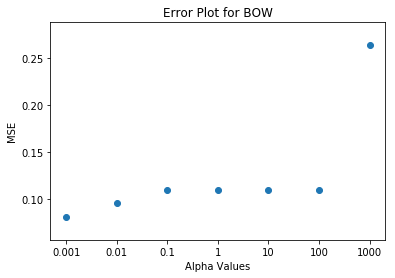

In [49]:
#Plotting the error graph
dumm_points = [1,2,3,4,5,6,7]
plt.scatter(dumm_points,MSE)
plt.xticks(range(1,8),params['alpha'])
plt.xlabel('Alpha Values')
plt.ylabel('MSE')
plt.title('Error Plot for BOW')
plt.show()

In [50]:
#Training the model with best estimator
bow_svm_model = grid_clf.best_estimator_
bow_svm_labels = bow_svm_model.predict(bow_test_data)

In [51]:
#Checking accuracy for test data
from sklearn.metrics import accuracy_score
bow_grid_score = accuracy_score(bow_svm_labels,balanced_test_score)*float(100)
print("The accuracy for test data for bow model is ----> "+str(bow_grid_score))

The accuracy for test data for bow model is ----> 91.78333333333333


In [52]:
#Checking accuracy for train data
bow_svm_labels_train = bow_svm_model.predict(bow_train_data)
bow_grid_score_train = accuracy_score(bow_svm_labels_train,balanced_train_score)*float(100)
print("The accuracy for train data for bow model is ----> "+str(bow_grid_score_train))

The accuracy for train data for bow model is ----> 93.88214285714285


### 2.Finding Important Features for both the classes

In [65]:
pos_imp_words = bow_svm_model.coef_[bow_svm_model.coef_>0]
neg_imp_words = bow_svm_model.coef_[bow_svm_model.coef_<0]

In [89]:
#Function to get important positive words
def getposWords(pos_words):
    x = sorted(pos_words,reverse=True)
    y = x[0:10]
    indices = []
    for i in y:
        index = np.where(bow_svm_model.coef_==i)
        indices.append(index[1])
    return indices

In [115]:
#Function to get important negative words
def getnegWords(neg_words):
    x = sorted(neg_words)
    y = x[0:10]
    indices = []
    for i in y:
        index = np.where(bow_svm_model.coef_==i)
        indices.append(index[1])
    return indices

In [116]:
#Finding the top 10 important features of positive class
imp_pos_words = np.take(bow_model.get_feature_names(),getposWords(pos_imp_words))
imp_pos_words

array([['amaz'],
       ['perfect'],
       ['best'],
       ['delici'],
       ['excel'],
       ['great'],
       ['smooth'],
       ['awesom'],
       ['rich'],
       ['nice']], dtype='<U30')

In [117]:
#Finding the top 10 important features of negative class
imp_neg_words = np.take(bow_model.get_feature_names(),getnegWords(neg_imp_words))
imp_neg_words

array([['worst'],
       ['disappoint'],
       ['horribl'],
       ['bland'],
       ['aw'],
       ['terribl'],
       ['threw'],
       ['return'],
       ['wast'],
       ['wors']], dtype='<U30')

### 3. Applying RandomizedSearchCV to find alpha

In [118]:
rand_params = {'alpha': np.random.uniform(0.0001,0.001,20)}
rand_estimator = SGDClassifier(loss='hinge')
rand_clf = RandomizedSearchCV(rand_estimator,rand_params,scoring='accuracy',n_jobs=-1)

In [119]:
rand_clf.fit(bow_train_data,balanced_train_score)

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'alpha': array([0.00093, 0.00056, 0.00082, 0.00028, 0.00048, 0.0003 , 0.00063,
       0.00051, 0.00088, 0.00013, 0.00098, 0.00011, 0.00073, 0.00014,
       0.0003 , 0.00077, 0.00063, 0.00045, 0.00011, 0.0002 ])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [120]:
rand_clf.best_params_

{'alpha': 0.0008224609502791218}

In [124]:
rand_clf.cv_results_

F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessi

{'mean_fit_time': array([0.11559566, 0.11925729, 0.15590199, 0.14658475, 0.19855173,
        0.22487084, 0.19122299, 0.201883  , 0.21987359, 0.16890224]),
 'std_fit_time': array([0.00249851, 0.00834101, 0.05822597, 0.03079551, 0.02184034,
        0.04207904, 0.01900268, 0.0376877 , 0.02727273, 0.02289303]),
 'mean_score_time': array([0.03498038, 0.04230889, 0.05596741, 0.05829716, 0.0899485 ,
        0.0583024 , 0.06962665, 0.06596287, 0.05996529, 0.0642964 ]),
 'std_score_time': array([0.00355689, 0.01036588, 0.02175905, 0.01108129, 0.0071139 ,
        0.01064952, 0.00555436, 0.00859723, 0.00081576, 0.00124645]),
 'param_alpha': masked_array(data=[0.00020213054489464502, 0.0009301848037770957,
                    0.00010532188417158055, 0.0008224609502791218,
                    0.0003025803652526527, 0.0005069095074683055,
                    0.00013358675047648406, 0.0005573652353125942,
                    0.00010798524154588356, 0.0006269470275614655],
              mask=[False, F

In [125]:
test_score_rand_bow = rand_clf.cv_results_['mean_test_score']
MSE = 1-test_score_rand_bow
MSE

array([0.089     , 0.08178571, 0.08882143, 0.08078571, 0.08546429,
       0.08325   , 0.09025   , 0.08146429, 0.0955    , 0.0845    ])

In [139]:
#Retrieving the random alpha values
rand_param = rand_clf.cv_results_['params']
rand_param = [i['alpha'] for i in rand_param]

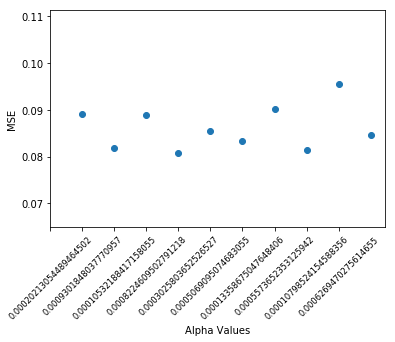

In [142]:
#Plotting the error graph
dumm_points = [i for i in range(1,11)]
plt.scatter(dumm_points,MSE)
plt.xlabel('Alpha Values')
plt.ylabel('MSE')
plt.xticks(range(0,10),rand_param,rotation='45',size='small')
plt.show()

In [143]:
#Training the model with best estimator
bow_svm_model_rand = rand_clf.best_estimator_
bow_svm_labels_rand = bow_svm_model_rand.predict(bow_test_data)

In [144]:
bow_rand_score = accuracy_score(bow_svm_labels_rand,balanced_test_score)*float(100)
print("The accuracy score for test data with BOW model is ----> "+str(bow_rand_score))

The accuracy score for test data with BOW model is ----> 92.16666666666666


In [145]:
#Finding accuracy for train data
bow_svm_labels_rand_train = bow_svm_model_rand.predict(bow_train_data)
bow_rand_score_train = accuracy_score(bow_svm_labels_rand_train,balanced_train_score)*float(100)
print("The accuracy score for train data with BOW model is ----> "+str(bow_rand_score_train))

The accuracy score for train data with BOW model is ----> 94.45714285714286


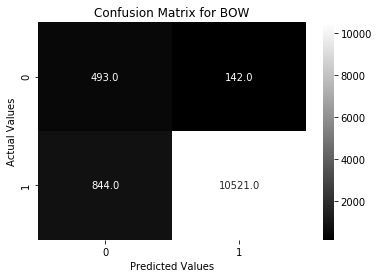

In [146]:
#Building the confustion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
bow_cnf = confusion_matrix(bow_svm_labels,balanced_test_score)
sns.heatmap(bow_cnf,cmap=plt.cm.gray,annot=True,fmt='.1f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for BOW')
plt.show()

In [147]:
#Finding the tnr,fpr,fnr,tpr
tnr_bow = bow_cnf[0,0] 
fpr_bow = bow_cnf[0,1] 
fnr_bow = bow_cnf[1,0] 
tpr_bow = bow_cnf[1,1] 
print('The TNR for BOW is '+str(tnr_bow))
print('The FPR for BOW is '+str(fpr_bow))
print('The FNR for BOW is '+str(fnr_bow))
print('The TPR for BOW is '+str(tpr_bow))

The TNR for BOW is 493
The FPR for BOW is 142
The FNR for BOW is 844
The TPR for BOW is 10521


In [148]:
#Finding the precision and recall
precision_bow = tpr_bow/(tpr_bow+fpr_bow)
recall_bow = tpr_bow/(tpr_bow+fnr_bow)
print('The precision of the model is '+str(precision_bow))
print('The recall of the model is '+str(recall_bow))

The precision of the model is 0.986682922254525
The recall of the model is 0.9257369115706116


In [149]:
#Finding the F1 score
f1_score_bow = 2*(precision_bow*recall_bow)/(precision_bow+recall_bow)
print("The F1 score of the model is "+str(f1_score_bow))

The F1 score of the model is 0.9552387869983658


### Conclusion: RandomizedSearchCV Provided better params

# TF-IDF Vectorizer

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
tfidf_train_data = tfidf_model.fit_transform(balanced_train_data.CleanedText)
tfidf_train_data.shape

(28000, 21028)

In [151]:
tfidf_test_data = tfidf_model.transform(balanced_test_data.CleanedText)
tfidf_test_data.shape

(12000, 21028)

### 1.Finding right alpha with GridSearchCV

In [164]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
tf_estimator = SGDClassifier(loss='hinge')
tf_params = {'alpha':[10**-4,10**-3,10**-2,10**-1,10**0,10**1]}
grid_clf_tfidf = GridSearchCV(tf_estimator,tf_params,scoring='accuracy')

In [165]:
#Finding the optimal C and gamma
grid_clf_tfidf.fit(tfidf_train_data,balanced_train_score)

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [166]:
grid_clf_tfidf.best_params_

{'alpha': 0.0001}

In [171]:
test_score_tfidf_grid = grid_clf_tfidf.cv_results_['mean_test_score']
MSE = 1-test_score_tfidf_grid
MSE

array([0.08092857, 0.10957143, 0.10957143, 0.10957143, 0.10957143,
       0.10957143])

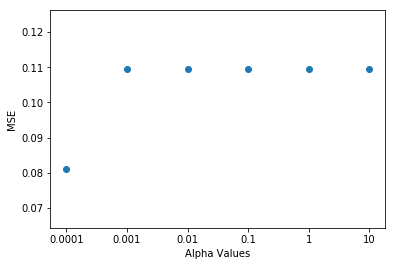

In [173]:
#Plotting the error graph
dumm_points = [i for i in range(1,7)]
plt.scatter(dumm_points,MSE)
plt.xticks(range(1,7),tf_params['alpha'])
plt.xlabel('Alpha Values')
plt.ylabel('MSE')
plt.show()

In [174]:
#Finding the accuracy with optimal parameters on test data
from sklearn.metrics import accuracy_score
tfidf_model_grid = grid_clf_tfidf.best_estimator_
tfidf_test_labels = tfidf_model_grid.predict(tfidf_test_data)
tfidf_score_test = accuracy_score(tfidf_test_labels,balanced_test_score)*float(100)
print("The accuracy with test data on optimal params is ---> "+str(tfidf_score_test))

The accuracy with test data on optimal params is ---> 91.475


In [175]:
#Finding the accuracy on train data
tfidf_train_labels = tfidf_model_grid.predict(tfidf_train_data)
tfidf_score_train = accuracy_score(tfidf_train_labels,balanced_train_score)*float(100)
print("The accuracy with train data on optimal params is ---> "+str(tfidf_score_train))

The accuracy with train data on optimal params is ---> 92.875


### 2. Finding Important Features for both the classes

In [191]:
#Initializing pos and neg words
pos_imp_words = tfidf_model_grid.coef_[tfidf_model_grid.coef_>0]
neg_imp_words = tfidf_model_grid.coef_[tfidf_model_grid.coef_<0]

In [199]:
def getposWords(pos_words):
    x = sorted(pos_words,reverse=True)
    y = x[0:10]
    indices = []
    for i in y:
        index = np.where(tfidf_model_grid.coef_==i)
        indices.append(index[1])
    return indices

In [200]:
def getnegWords(neg_words):
    x = sorted(neg_words)
    y = x[0:10]
    indices = []
    for i in y:
        index = np.where(tfidf_model_grid.coef_==i)
        indices.append(index[1])
    return indices

In [202]:
#Finding the top 10 important features of positive class
imp_pos_words = np.take(tfidf_model.get_feature_names(),getposWords(pos_imp_words))
imp_pos_words

array([['great'],
       ['best'],
       ['love'],
       ['delici'],
       ['excel'],
       ['perfect'],
       ['nice'],
       ['amaz'],
       ['find'],
       ['wonder']], dtype='<U30')

In [203]:
#Finding the top 10 important features of positive class
imp_pos_words = np.take(tfidf_model.get_feature_names(),getnegWords(neg_imp_words))
imp_pos_words

array([['worst'],
       ['disappoint'],
       ['aw'],
       ['terribl'],
       ['return'],
       ['horribl'],
       ['threw'],
       ['wast'],
       ['bland'],
       ['stale']], dtype='<U30')

### 3. Applying RandomizedSearchCV to find alpha

In [176]:
tfidf_params_rand = {'alpha': np.random.uniform(0.0001,0.001,20)}
tfidf_estimator_rand = SGDClassifier(loss='hinge')
rand_clf_tfidf = RandomizedSearchCV(tfidf_estimator_rand,tfidf_params_rand,scoring='accuracy')

In [177]:
rand_clf_tfidf.fit(tfidf_train_data,balanced_train_score)

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'alpha': array([0.00059, 0.00029, 0.00079, 0.00033, 0.00068, 0.00057, 0.00054,
       0.00073, 0.00071, 0.00092, 0.00045, 0.00083, 0.00072, 0.00088,
       0.00017, 0.00024, 0.00097, 0.00055, 0.0007 , 0.00067])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [178]:
rand_clf_tfidf.best_params_

{'alpha': 0.0002863735804798803}

In [179]:
#Calculating the MSE
test_score_tfidf_rand = rand_clf_tfidf.cv_results_['mean_test_score']
MSE = 1-test_score_tfidf_rand
MSE

array([0.10946429, 0.10957143, 0.10957143, 0.10946429, 0.10917857,
       0.10946429, 0.10267857, 0.10907143, 0.10814286, 0.10957143])

In [181]:
#Retrieving the random parameters
rand_params = rand_clf_tfidf.cv_results_['params']
rand_params = [i['alpha'] for i in rand_params]

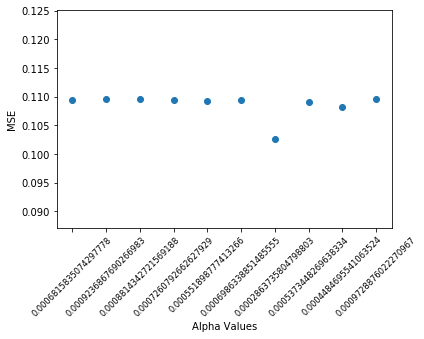

In [183]:
#plotting the error graph
dumm_points = [i for i in range(1,11)]
plt.scatter(dumm_points,MSE)
plt.xlabel('Alpha Values')
plt.ylabel('MSE')
plt.xticks(range(1,11),rand_params,size='small',rotation='45')
plt.show()

In [184]:
#Finding the accuracy on test data with optimal gamma and C
tfidf_model_rand = rand_clf_tfidf.best_estimator_
tfidf_test_labels_rand = tfidf_model_rand.predict(tfidf_test_data)
tfidf_test_score_rand = accuracy_score(tfidf_test_labels_rand,balanced_test_score)*float(100)
print('The accuracy score with optimal params on test data is ---> '+str(tfidf_test_score_rand))

The accuracy score with optimal params on test data is ---> 89.48333333333333


In [185]:
#Finding the accuracy on train data 
tfidf_train_labels_rand = tfidf_model_rand.predict(tfidf_train_data)
tfidf_train_score_rand = accuracy_score(tfidf_train_labels_rand,balanced_train_score)*float(100)
print('The accuracy score with optimal params on train data is ---> '+str(tfidf_train_score_rand))

The accuracy score with optimal params on train data is ---> 89.81428571428572


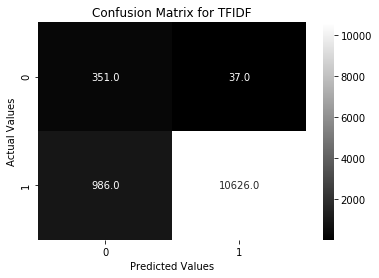

In [186]:
#Building the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
tfidf_cnf = confusion_matrix(tfidf_test_labels,balanced_test_score)
sns.heatmap(tfidf_cnf,annot=True,cmap=plt.cm.gray,fmt='.1f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for TFIDF')
plt.show()

In [187]:
#Finding the tnr,fnr,fpr,tpr
tnr_tfidf = tfidf_cnf[0,0]
fpr_tfidf = tfidf_cnf[0,1]
fnr_tfidf = tfidf_cnf[1,0]
tpr_tfidf = tfidf_cnf[1,1]
print("The TNR for TFIDF is "+str(tnr_tfidf))
print('The FPR for TFIDF is '+str(fpr_tfidf))
print("The FNR for TFIDF is "+str(fnr_tfidf))
print("The TPR for TFIDF is "+str(tpr_tfidf))

The TNR for TFIDF is 351
The FPR for TFIDF is 37
The FNR for TFIDF is 986
The TPR for TFIDF is 10626


In [188]:
#Finding the precision and recall
precision_tfidf = tpr_tfidf/(tpr_tfidf+fpr_tfidf)
recall_tfidf = tpr_tfidf/(tpr_tfidf+fnr_tfidf)
print('The Precision of TFIDF is '+str(precision_tfidf))
print("The Recall of TFIDF is "+str(recall_tfidf))

The Precision of TFIDF is 0.9965300572071649
The Recall of TFIDF is 0.9150878401653462


In [189]:
#Finding the F1 Score
f1_tfidf = 2*(precision_tfidf*recall_tfidf)/(precision_tfidf+recall_tfidf)
print("The F1 Score with TFIDF Vectorizer is "+str(f1_tfidf))

The F1 Score with TFIDF Vectorizer is 0.954074074074074


### Conclusion: GridSearchCV Provided better params

# Word2Vec

In [204]:
import re
#Removing Html tags
def cleanHtml(sentence):
    cleanText = re.sub('<.*?>','',sentence)
    return cleanText
#Removing Punctuations
def cleanPunc(word):
    cleaned = re.sub(r'[#|!|?|\'|@|"]','',word)
    cleaned = re.sub(r'[,|.|(|)|\|/]',' ',word)
    return cleaned

In [209]:
#Retrieving 40000 data points for train test split
train_test_data = sorted_data.iloc[:40000]

In [210]:
#Filtering the sentences for using in word2vec
from gensim.models import Word2Vec
final_sentences = []
for sentence in train_test_data.Text.values:    
    sent = cleanHtml(sentence)       #Cleaning the html tags from the sentences
    filtered_sentence = []           #The filtered sentences to be stored in this list
    for word in sent.split():    #Looping through each word
        for cleaned_word in cleanPunc(word).split():   #Cleaning the punctuations from each word
            if(cleaned_word.isalpha()):              
                filtered_sentence.append(cleaned_word.lower())   #Converting the cleaned word to lowercase
            else:
                continue
    final_sentences.append(filtered_sentence)      #Inserting each filtered sentence to the final list

In [211]:
len(final_sentences)

40000

In [212]:
#Training the Word2Vec model
train_sentences = final_sentences[:28000]
w2v_model = Word2Vec(train_sentences,size=50,workers=4)

In [213]:
words = set(w2v_model.wv.vocab)
len(words)

10000

# Average Word2Vec

In [214]:
#Building model for average word2vec
sent_vectors = []
for sentence in final_sentences:    
    sentence_vectors = np.zeros(50)    #Building word vectors and initializing with 0
    count = 0   #Counting the total number of words in the sentence
    for word in sentence:
        try:
            count+=1           
            w2v = w2v_model.wv[word]    #Appling word2vec for each word
            sentence_vectors+=w2v        #Adding word2vec of each word to sentence vectors
        except:
            pass
    sentence_vectors/=count            #Computing average word2vec
    sent_vectors.append(sentence_vectors)

In [215]:
sent_vectors_df = pd.DataFrame(sent_vectors)
sent_vectors_df.shape

(40000, 50)

In [218]:
#Building 70% and 30% train and test data
avgw2v_train_data = sent_vectors_df.iloc[:28000]
avgw2v_test_data = sent_vectors_df.iloc[28000:40000]
print(avgw2v_train_data.shape)
avgw2v_test_data.shape

(28000, 50)


(12000, 50)

### 1. Applying GridSearchCV to find optimal alpha

In [220]:
from sklearn.model_selection import GridSearchCV
avgw2v_estimator = SGDClassifier(loss='hinge')
avgw2v_params = {'alpha':[10**-4,10**-3,10**-2,10**-1,10**0,10**1]}
grid_clf_avgw2v = GridSearchCV(avgw2v_estimator,avgw2v_params,scoring='accuracy')

In [221]:
grid_clf_avgw2v.fit(avgw2v_train_data,balanced_train_score)

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [223]:
grid_clf_avgw2v.best_params_

{'alpha': 0.0001}

In [225]:
test_score_grid_avgw2v = grid_clf_avgw2v.cv_results_['mean_test_score']
MSE = 1-test_score_grid_avgw2v
MSE

array([0.10628571, 0.10903571, 0.10957143, 0.10957143, 0.10957143,
       0.10957143])

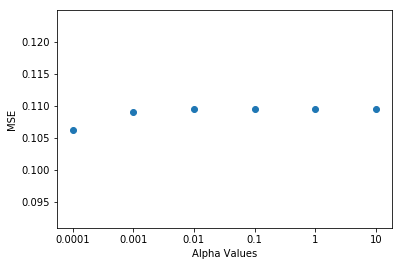

In [227]:
#Plotting the error graph
dumm_points = [i for i in range(0,6)]
plt.scatter(dumm_points,MSE)
plt.xlabel('Alpha Values')
plt.ylabel('MSE')
plt.xticks(range(0,6),avgw2v_params['alpha'])
plt.show()

In [49]:
#Finding accuracy on test data with optimal estimator
avgw2v_svc_model = grid_clf_avgw2v.best_estimator_
avgw2v_test_labels = avgw2v_svc_model.predict(avgw2v_test_data)
avgw2v_test_score = accuracy_score(avgw2v_test_labels,balanced_test_score)*float(100)
print('The accuracy with Average Word2Vec model is ---> '+str(avgw2v_test_score))

The accuracy with Average Word2Vec model is ---> 90.10000000000001


In [51]:
#Finding accuracy on train data with optimal estimator
avgw2v_train_labels = avgw2v_svc_model.predict(avgw2v_train_data)
avgw2v_train_score = accuracy_score(avgw2v_train_labels,balanced_train_score)*float(100)
print('The accuracy with average Word2Vec model on train data--->  '+str(avgw2v_train_score))

The accuracy with average Word2Vec model on train data--->  91.91


### 2. Applying RandomizedSeachCV to find optimal C and gamma

In [228]:
from sklearn.model_selection import RandomizedSearchCV
avgw2v_estimator = SGDClassifier(loss='hinge')
avgw2v_params_rand = {'alpha': np.random.uniform(0.0001,0.001,20)}
avgw2v_rand_clf = RandomizedSearchCV(avgw2v_estimator,avgw2v_params_rand,scoring='accuracy')

In [229]:
avgw2v_rand_clf.fit(avgw2v_train_data,balanced_train_score)

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'alpha': array([0.00093, 0.00013, 0.00014, 0.00086, 0.00053, 0.00021, 0.00055,
       0.00061, 0.00053, 0.00048, 0.00077, 0.00063, 0.00012, 0.00025,
       0.00053, 0.00061, 0.00037, 0.00013, 0.00085, 0.00096])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [230]:
avgw2v_rand_clf.best_params_

{'alpha': 0.00024818319572339346}

In [237]:
test_score_avgw2v_rand = avgw2v_rand_clf.cv_results_['mean_test_score']
MSE = 1-test_score_avgw2v_rand
MSE

array([0.10464286, 0.10532143, 0.11153571, 0.10853571, 0.11092857,
       0.10714286, 0.10739286, 0.10703571, 0.10903571, 0.10925   ])

In [238]:
rand_params = avgw2v_rand_clf.cv_results_['params']
rand_params = [i['alpha'] for i in rand_params]

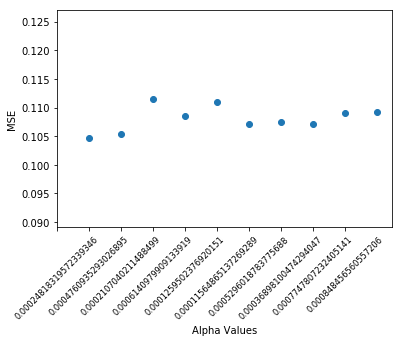

In [245]:
#Plotting the error graph
dumm_points = [i for i in range(1,11)]
plt.scatter(dumm_points,MSE)
plt.xlabel('Alpha Values')
plt.ylabel('MSE')
plt.xticks(range(0,10),rand_params,size='small',rotation='45')
plt.show()

In [246]:
#Finding accuracy on test data with optimal estimator
from sklearn.metrics import accuracy_score
avgw2v_svc_model_rand = avgw2v_rand_clf.best_estimator_
avgw2v_test_labels_rand = avgw2v_svc_model_rand.predict(avgw2v_test_data)
avgw2v_test_score_rand = accuracy_score(avgw2v_test_labels_rand,balanced_test_score)*float(100)
print('The accuracy score on test data with Average Word2Vec is---> '+str(avgw2v_test_score_rand))

The accuracy score on test data with Average Word2Vec is---> 89.24166666666666


In [247]:
#Finding accuracy on train data with optimal estimator
avgw2v_train_labels_rand = avgw2v_svc_model_rand.predict(avgw2v_train_data)
avgw2v_train_score_rand = accuracy_score(avgw2v_train_labels_rand,balanced_train_score)*float(100)
print('The accuracy score on train data with Average Word2Vec is---> '+str(avgw2v_train_score_rand))

The accuracy score on train data with Average Word2Vec is---> 89.62857142857142


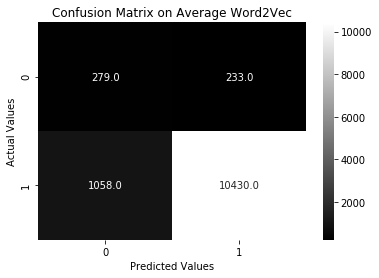

In [248]:
#Building the confusion matrix
from sklearn.metrics import confusion_matrix
avgw2v_cnf = confusion_matrix(avgw2v_test_labels_rand,balanced_test_score)
sns.heatmap(avgw2v_cnf,annot=True,fmt='.1f',cmap=plt.cm.gray)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix on Average Word2Vec')
plt.show()

In [249]:
#Finding the tnr,fnr,fpr,tpr
tnr_avgw2v = avgw2v_cnf[0,0]
fpr_avgw2v = avgw2v_cnf[0,1]
fnr_avgw2v = avgw2v_cnf[1,0]
tpr_avgw2v = avgw2v_cnf[1,1]
print("The TNR for Average Word2Vec is "+str(tnr_avgw2v))
print('The FPR for Average Word2Vec is '+str(fpr_avgw2v))
print("The FNR for Average Word2Vec is "+str(fnr_avgw2v))
print("The TPR for Average Word2Vec is "+str(tpr_avgw2v))

The TNR for Average Word2Vec is 279
The FPR for Average Word2Vec is 233
The FNR for Average Word2Vec is 1058
The TPR for Average Word2Vec is 10430


In [250]:
#Finding the precision and recall
precision_avgw2v = tpr_avgw2v/(tpr_avgw2v+fpr_avgw2v)
recall_avgw2v = tpr_avgw2v/(tpr_avgw2v+fnr_avgw2v)
print('The precision for Average Word2Vec model is '+str(precision_avgw2v))
print('The recall for Average Word2Vec model is '+str(recall_avgw2v))

The precision for Average Word2Vec model is 0.9781487386289037
The recall for Average Word2Vec model is 0.9079038997214485


In [251]:
#Finding the F1 Score
f1_avgw2v = 2*(precision_avgw2v*recall_avgw2v)/(precision_avgw2v+recall_avgw2v)
print('The F1 Score for Average Word2Vec is '+str(f1_avgw2v))

The F1 Score for Average Word2Vec is 0.9417182068529638


### Conclusion: GridSearchCV Provided better params

# TFIDF-Word2Vec

In [253]:
#Taking 10k data points
train_data = sorted_data.iloc[:7000]
train_test_data = sorted_data.iloc[:10000]
fin_sentences = final_sentences[:10000]

In [260]:
train_data_score = balanced_train_score[:7000]
test_data_score = balanced_test_score[7000:10000]

In [254]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_model = TfidfVectorizer()
tf_idf_model.fit(train_data.Text.values)
tf_idf_model_final = tf_idf_model.transform(train_test_data.Text.values)
tf_idf_model_final.shape

(10000, 19568)

In [255]:
#Building the Weighted TFIDF W2V
tf_features = tf_idf_model.get_feature_names()    #Retrieving the tfidf feature names
weighted_sentences = [];
row = 0;
for sentence in fin_sentences:
    sum_vector = np.zeros(50)     #Building word vectors and initializing with 0
    weighted_sum = 0;             #Initializing the weighted sum to 0
    for word in sentence:         #Looping through each word
        try: 
            w2v = w2v_model.wv[word]         #Applying the word2vec model on each word
            tf_idf = tf_idf_model_final[row,tf_features.index(word)]      #Retrieving the tfidf value for the corresponding word
            sum_vector += (w2v*tf_idf)          #Computing tfidf weighted w2v
            weighted_sum += tf_idf              #Computing the total tfidf weight
        except:
            pass
    sum_vector/=weighted_sum              #Final tfidf weighted w2v
    weighted_sentences.append(sum_vector)
    row += 1 

In [256]:
#Converting the weighted sentences list to a DataFrame
weighted_df = pd.DataFrame(weighted_sentences) 
weighted_df.shape

(10000, 50)

In [267]:
#Building 70% and 30% train-test data set
tfidfw2v_train_data = weighted_df.iloc[0:7000,:]
tfidfw2v_test_data = weighted_df.iloc[7000:10000]
print(tfidfw2v_train_data.shape)
tfidfw2v_test_data.shape

(7000, 50)


(3000, 50)

### 1. Using GridSearchCV to find Optimal alpha

In [258]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
tfidfw2v_params = {'alpha':[10**-4,10**-3,10**-2,10**-1,10**0,10**1]}
tfidfw2v_estimator = SGDClassifier(loss='hinge')
tfidfw2v_grid_clf = GridSearchCV(tfidfw2v_estimator,tfidfw2v_params,scoring='accuracy')

In [261]:
tfidfw2v_grid_clf.fit(tfidfw2v_train_data,train_data_score)

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [262]:
tfidfw2v_grid_clf.best_params_

{'alpha': 0.001}

In [264]:
test_score_tfidfw2v_grid = tfidfw2v_grid_clf.cv_results_['mean_test_score']
MSE = 1-test_score_tfidfw2v_grid
MSE

array([0.17242857, 0.11242857, 0.11585714, 0.11585714, 0.11585714,
       0.11585714])

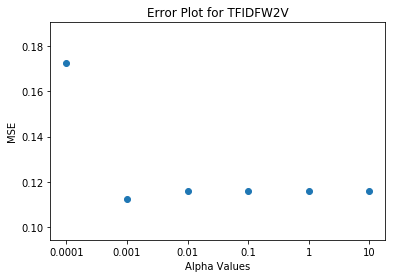

In [265]:
#Plotting the error graph
dumm_points = [i for i in range(1,7)]
plt.scatter(dumm_points,MSE)
plt.xlabel('Alpha Values')
plt.ylabel('MSE')
plt.title('Error Plot for TFIDFW2V')
plt.xticks(range(1,7),tfidfw2v_params['alpha'])
plt.show()

In [268]:
#Getting the accuracy of test data with best estimator
tfidfw2v_svc_model = tfidfw2v_grid_clf.best_estimator_
tfidfw2v_test_labels = tfidfw2v_svc_model.predict(tfidfw2v_test_data)
tfidfw2v_test_score = accuracy_score(tfidfw2v_test_labels,test_data_score)*float(100)
print('The accuracy with TFIDF Word2Vec is ---> '+str(tfidfw2v_test_score))

The accuracy with TFIDF Word2Vec is ---> 86.66666666666667


In [270]:
#Getting the accuracy of train data with best estimator
tfidfw2v_train_labels = tfidfw2v_svc_model.predict(tfidfw2v_train_data)
tfidfw2v_train_score = accuracy_score(tfidfw2v_train_labels,train_data_score)*float(100)
print('The accuracy score with TFIDF Word2Vec is ---> '+str(tfidfw2v_train_score))

The accuracy score with TFIDF Word2Vec is ---> 88.58571428571429


### 2. Using RandomizedSearchCV to get alpha

In [271]:
tfidfw2v_params = {'alpha': np.random.uniform(0.0001,0.001,20)}
tfidfw2v_rand_clf = RandomizedSearchCV(tfidfw2v_estimator,tfidfw2v_params,scoring='accuracy')

In [272]:
tfidfw2v_rand_clf.fit(tfidfw2v_train_data,train_data_score)

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'alpha': array([0.00028, 0.0007 , 0.00098, 0.0006 , 0.00076, 0.00094, 0.00051,
       0.0007 , 0.00025, 0.00019, 0.00023, 0.00041, 0.00047, 0.00097,
       0.0002 , 0.00062, 0.00085, 0.00078, 0.0004 , 0.00092])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [273]:
tfidfw2v_rand_clf.best_params_

{'alpha': 0.0006968395650983009}

In [274]:
#Finding accuracy of test data with optimal params
tfidfw2v_svc_model_rand = tfidfw2v_rand_clf.best_estimator_
tfidfw2v_test_labels_rand = tfidfw2v_svc_model_rand.predict(tfidfw2v_test_data)
tfidfw2v_test_score_rand = accuracy_score(tfidfw2v_test_labels_rand,test_data_score)*float(100)
print('The accuracy score for test data with TFIDF Word2Vec is ---> '+str(tfidfw2v_test_score_rand))

The accuracy score for test data with TFIDF Word2Vec is ---> 86.66666666666667


In [276]:
#Finding the accuracy of train data with optimal params
tfidfw2v_train_labels_rand = tfidfw2v_svc_model_rand.predict(tfidfw2v_train_data)
tfidfw2v_train_score_rand = accuracy_score(tfidfw2v_train_labels_rand,train_data_score)*float(100)
print('The accuracy score for train data with TFIDF Word2Vec is ---> '+str(tfidfw2v_train_score_rand))

The accuracy score for train data with TFIDF Word2Vec is ---> 88.84285714285714


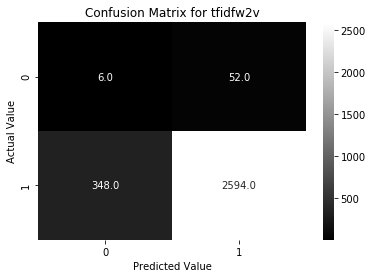

In [279]:
#Building the confusion matrix
tfidfw2v_cnf = confusion_matrix(tfidfw2v_test_labels_rand,test_data_score)
sns.heatmap(tfidfw2v_cnf,fmt='.1f',annot=True,cmap=plt.cm.gray)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for tfidfw2v')
plt.show()

In [280]:
#Finding the tnr,fnr,fpr,tpr
tnr_tfidfw2v = tfidfw2v_cnf[0,0]
fpr_tfidfw2v = tfidfw2v_cnf[0,1]
fnr_tfidfw2v = tfidfw2v_cnf[1,0]
tpr_tfidfw2v = tfidfw2v_cnf[1,1]
print("The TNR for Average Word2Vec is "+str(tnr_tfidfw2v))
print('The FPR for Average Word2Vec is '+str(fpr_tfidfw2v))
print("The FNR for Average Word2Vec is "+str(fnr_tfidfw2v))
print("The TPR for Average Word2Vec is "+str(tpr_tfidfw2v))

The TNR for Average Word2Vec is 6
The FPR for Average Word2Vec is 52
The FNR for Average Word2Vec is 348
The TPR for Average Word2Vec is 2594


In [281]:
#Finding the precision and recall
precision_tfidfw2v = tpr_tfidfw2v/(tpr_tfidfw2v+fpr_tfidfw2v)
recall_tfidfw2v = tpr_tfidfw2v/(tpr_tfidfw2v+fnr_tfidfw2v)
print('The Precision with TFIDF Word2Vec is ---> '+str(precision_tfidfw2v))
print('The Recall with TFIDF Word2Vec is ---> '+str(recall_tfidfw2v))

The Precision with TFIDF Word2Vec is ---> 0.9803476946334089
The Recall with TFIDF Word2Vec is ---> 0.8817131203263087


In [282]:
#Finding the F1 Score
f1_tfidfw2v = (2*precision_tfidfw2v*recall_tfidfw2v)/(precision_tfidfw2v+recall_tfidfw2v)
print('The F1 Score with TFIDF Word2Vec is --- > '+str(f1_tfidfw2v))

The F1 Score with TFIDF Word2Vec is --- > 0.9284180386542591


### Conclusion: GridSearchCV Provided better parameters

# Summary

In [283]:
summary = {'Model':['Bag Of Words','TFIDF Vectorizer','Average Word2Vec','TFIDF Word2Vec'],'Best Params-alpha':['0.0008224609502791218','0.0001','0.0001','0.001'],'Test Accuracy':['92.16666666666666','91.475','90.10000000000001','86.66666666666667'],'Train Accuracy':['94.45714285714286','92.875','91.91','88.58571428571429']}
summary_df = pd.DataFrame(summary)
summary_df.head()

,Model,Best Params-alpha,Test Accuracy,Train Accuracy
0,Bag Of Words,0.0008224609502791218,92.16666666666666,94.45714285714286
1,TFIDF Vectorizer,0.0001,91.475,92.875
2,Average Word2Vec,0.0001,90.10000000000001,91.91
3,TFIDF Word2Vec,0.001,86.66666666666667,88.58571428571429


## Conclusion: Bag Of Words performed best among all the models.

# Applying SVM on the best model(BOW)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
params_final = {'C':[10**-2,10**-1,10**0,10**1,10**2],'gamma':[10**-2,10**-1,10**0,10**1,10**2]}
est = SVC(kernel='rbf')
grid_final = GridSearchCV(est,params_final)

In [ ]:
grid_final.fit(bow_train_data,balanced_train_score)

In [ ]:
grid_final.best_params_

In [ ]:
#Getting the accuracy with test data 
from sklearn.metrics import accuracy_score
bow_svc_final = grid_final.best_estimator_
bow_test_label_final = bow_svc_final.predict(bow_test_data)
bow_test_final_score = accuracy_score(bow_test_label_final,balanced_test_label)*float(100)
print('The accuracy with BOW for test data is ---> '+str(bow_test_final_score))

In [ ]:
#Getting the accuracy with train data 
bow_train_label_final = bow_svc_final.predict(bow_train_data)
bow_train_final_score = accuracy_score(bow_train_label_final,balanced_train_label)*float(100)
print('The accuracy with BOW for train data is ---> '+str(bow_train_final_score))

# Conclusion: The best model BOW with SVC have % accuracy